## Author
- Jiapeng Sun
- jsun@student.chalmers.se

- Hao Xu
- xhao@student.chalmers.se

## Part 1: Geometry of the feature space

### Question 2

#### 2.1 Simulate training and test data

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

##### 2.1.1 QDA Simulation

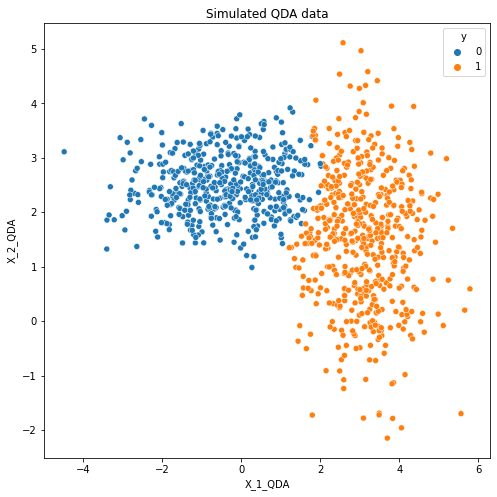

In [269]:
# QDA Simulation

# First generate some samples from assumptions to train the classifier
mean_0 = (-0.3, 2.5)
cov_0 = np.array([[1.8, 0], [0, 0.3]])
X_0_pre = np.random.multivariate_normal(mean_0, cov_0, (500,), 'warn')
y_0_pre = np.full(len(X_0_pre),0)

mean_1 = (3, 1.5)
cov_1 = np.array([[0.8, 0], [0, 1.5]])
X_1_pre = np.random.multivariate_normal(mean_1, cov_1, (500,), 'warn')
y_1_pre = np.full(len(X_1_pre),1)

X_pre = np.append(X_0_pre,X_1_pre,axis=0)
y_pre = np.append(y_0_pre,y_1_pre,axis=0)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_pre,y_pre)

# Then simulate data from the assumption and
# set label based on the pre trained calssifer
def get_QDA_simulation():
    X_0 = np.random.multivariate_normal(mean_0, cov_0, (500,), 'warn')
    X_1 = np.random.multivariate_normal(mean_1, cov_1, (500,), 'warn')
    X_QDA = np.append(X_0,X_1,axis=0)

    y_QDA = qda.predict(X_QDA)

    return X_QDA, y_QDA

X_QDA, y_QDA = get_QDA_simulation()

# Visulization
df_QDA = pd.concat([pd.DataFrame(X_QDA),pd.Series(y_QDA)],axis=1)
df_QDA.columns = ('X_1_QDA','X_2_QDA','y')

plt.figure(figsize=(8,8))
sns.scatterplot(x='X_1_QDA',y='X_2_QDA',hue='y',data=df_QDA)
plt.title('Simulated QDA data')
plt.show()

##### 2.1.2 CART Simulation

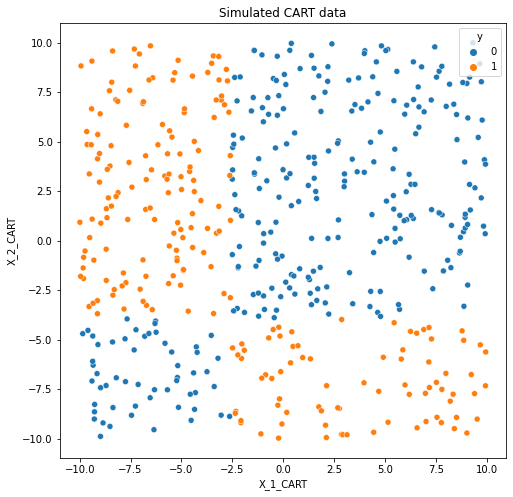

In [270]:
# CART Simulation

# By the assumption of CART that sequence of binary axis-parallel splits
# we fix 2 boundaries here and get 4 zones
# we set 2 zones to calss 1 and others class 0

bound_1 = -2.5
bound_2 = -3.9

def get_CART_simulation():
    X_1_CART = (np.random.random(500)-0.5)*20
    X_2_CART = (np.random.random(500)-0.5)*20
    X_CART = np.array(pd.concat([pd.Series(X_1_CART),pd.Series(X_2_CART)],axis=1))

    y_CART = []
    for i in range(500):
        if X_1_CART[i] > bound_1 and X_2_CART[i] < bound_2:
            y_CART.append(1)
        elif X_1_CART[i] < bound_1 and X_2_CART[i] > bound_2:
            y_CART.append(1)
        else:
            y_CART.append(0)

    return X_CART, y_CART

X_CART, y_CART = get_CART_simulation()

# Visulization
df_CART = pd.concat([pd.DataFrame(X_CART),pd.Series(y_CART)],axis=1)
df_CART.columns = ('X_1_CART','X_2_CART','y')

plt.figure(figsize=(8,8))
sns.scatterplot(x='X_1_CART',y='X_2_CART',hue='y',data=df_CART)
plt.title('Simulated CART data')
plt.show()

#### 2.2  Test error expectation

- We expect QDA on CART dataset would show a limited performance, because the diagonal zone distribution of specific class is hard to be captured by the Multivariate normal distribution model.

- We expect CART(RandomForest) on QDA dataset can show a nice performance, because the differenc Multivariate normal distribution can still be possible to be seperate by sequence decision boundries.


#### 2.3  Test error comparing

- We simulated 500 times for each dataset and prediction and take the average accuarcy score as metric.

- QDA on CART dataset shows a performance at about 92.8% accuarcy.

- CART on QDA dataset shows a performance at about 99.7% accuarcy.

- QDA shows a acceptable but not good enough performance on CART dataset, that might because the distribution of feature in differenc zones of CART dataset shows big difference with Multivariate normal distribution, especally when data are in diagonal zones, which can't be captured nicely by QDA model.

- Random Forest shows a nice performance on QDA dataset, that might because the different Multivariate normal distribution data under QDA assumption still can be seperate by the sequence decision boundaries, but we are not sure if this can still hold when the number of class grows.



##### 2.3.1 QDA on CART dataset

In [276]:
score_list_QDA = []

for i in range (500):
    X_CART, y_CART = get_CART_simulation()
    
    X_train_CART, X_test_CART, y_train_CART, y_test_CART = train_test_split(
        X_CART, y_CART, test_size=0.25, random_state=i, stratify=y_CART
        )
    
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_CART,y_train_CART)

    score_list_QDA.append(accuracy_score(y_test_CART,qda.predict(X_test_CART)))

print("QDA on CART dataset score: ",np.mean(score_list_QDA))

QDA on CART dataset score:  0.928096


##### 2.3.2 CART on QDA dataset

In [275]:
score_list_CART = []

for i in range (500):
    X_QDA, y_QDA = get_QDA_simulation()
    
    X_train_QDA, X_test_QDA, y_train_QDA, y_test_QDA = train_test_split(
        X_QDA, y_QDA, test_size=0.25, random_state=i, stratify=y_QDA
        )
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train_QDA,y_train_QDA)

    score_list_CART.append(accuracy_score(y_test_QDA,rfc.predict(X_test_QDA)))

print("CART on QDA dataset score: ",np.mean(score_list_CART))

CART on QDA dataset score:  0.9974560000000001


#### 2.4 Simulate data for the target method

- With the clear assumption of feature distribution under specific method, we can simulate the data from the distribution just as it assumed, which the target method will work best on.

## Part 2: Actual data and classification metrics

### Question 3

In [2]:
import pandas as pd
import numpy as np

In [171]:
# Load UCI breast cancer dataset with column names and remove ID column
uci_bc_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
    sep=",",
    header=None,
    names=[
        "id_number", "diagnosis", "radius_mean",
        "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean",
        "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se",
        "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst",
        "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst",
        "symmetry_worst", "fractal_dimension_worst"
    ],).drop("id_number", axis=1)

y = uci_bc_data.diagnosis.map({"B": 0, "M": 1}).to_numpy()
X = uci_bc_data.drop("diagnosis", axis=1).to_numpy()

In [4]:
feature_names = ["radius_mean",
        "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean",
        "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se",
        "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst",
        "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst",
        "symmetry_worst", "fractal_dimension_worst"]

#### 3.1 Data balancement

- Here we can see that there is about 60% / 40 % proportion in each label, there are more "benign" samples.
- Not a balanced case.

In [5]:
uci_bc_data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

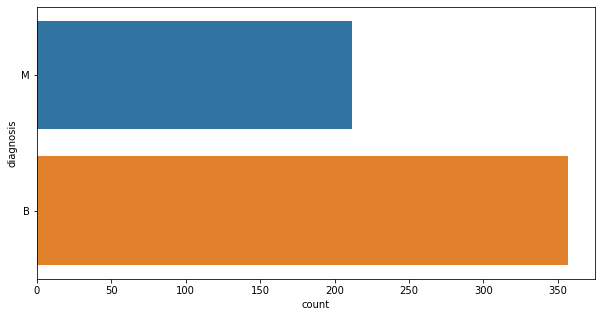

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.countplot(y="diagnosis", data=uci_bc_data)
plt.show()

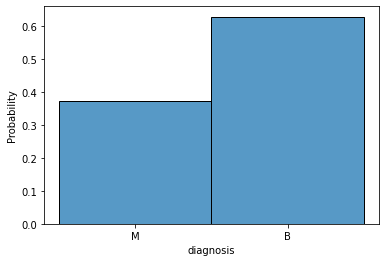

In [7]:
sns.histplot(uci_bc_data, x="diagnosis", stat="probability")

#### 3.2 Features investigation

- Here we see that all the features in this dataset are numerical

In [8]:
uci_bc_data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

- Here we see the features have highly varying scales and some of them show a high variance.

- Let the data be scaled/normalized/centred as before being used in a classification method might improve the performance.

In [9]:
uci_bc_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- By checking the correalation matrix we see that some features are highly corrleated.

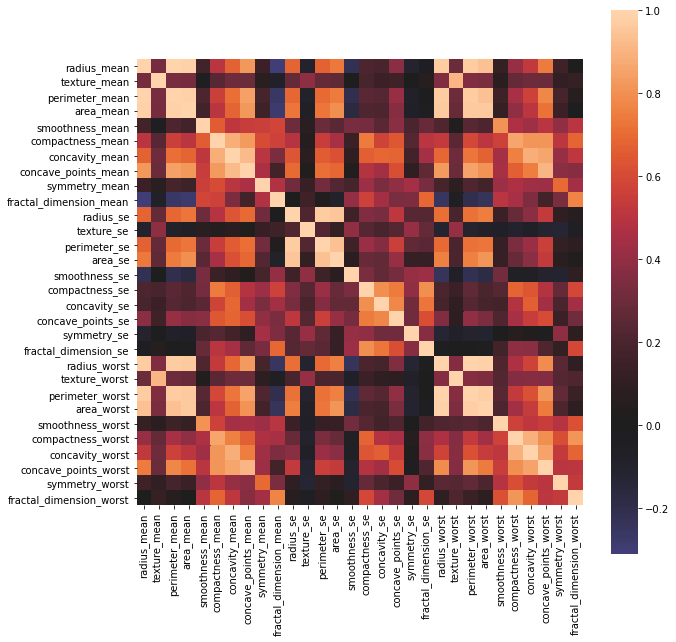

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = uci_bc_data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix,square=True,center=0)
plt.show()

#### 3.3 Quadratic Discriminant Analysis

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

In [12]:
qda.classes_

array([0, 1])

In [13]:
diag_D_class_0 = np.diag(np.sqrt(1./np.diagonal(qda.covariance_[0])))
diag_D_class_1 = np.diag(np.sqrt(1./np.diagonal(qda.covariance_[1])))

In [14]:
corr_class_0 = pd.DataFrame(diag_D_class_0.dot(qda.covariance_[0]).dot(diag_D_class_0),index=feature_names,columns=feature_names)
corr_class_1 = pd.DataFrame(diag_D_class_1.dot(qda.covariance_[1]).dot(diag_D_class_1),index=feature_names,columns=feature_names)

#### 3.4 Compare correlation matrix

In [15]:
corr_min = pd.concat([corrMatrix.iloc[:10,:10],corr_class_0.iloc[:10,:10],corr_class_1.iloc[:10,:10]]).stack().min()

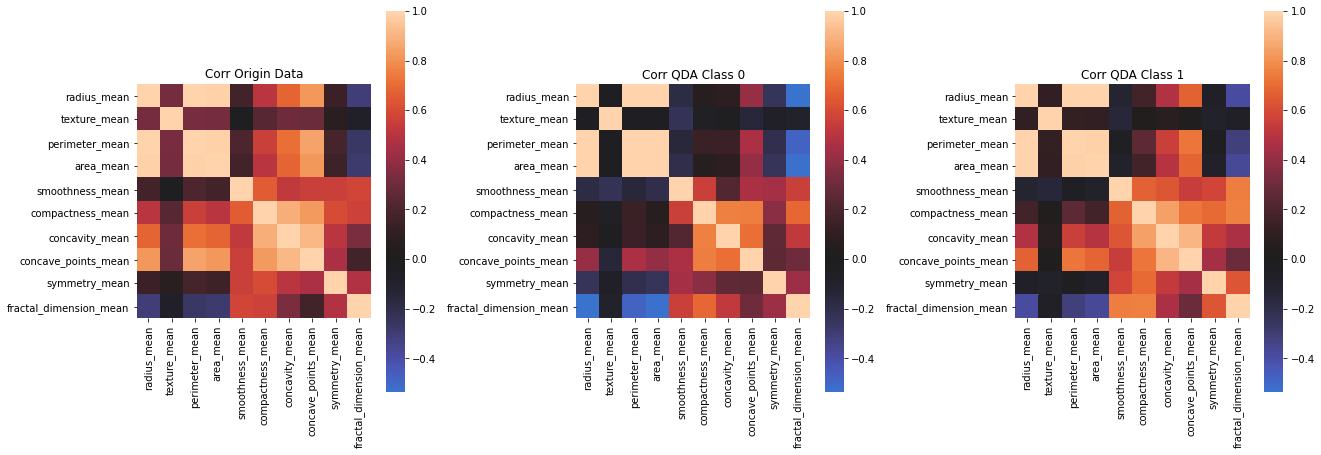

In [16]:
plt.figure(figsize=(21,7))

plt.subplot(131)
sns.heatmap(corrMatrix.iloc[:10,:10],square=True, vmin=corr_min, center=0).set_title('Corr Origin Data')
plt.subplot(132)
sns.heatmap(corr_class_0.iloc[:10,:10],square=True, vmin=corr_min, center=0).set_title('Corr QDA Class 0')
plt.subplot(133)
sns.heatmap(corr_class_1.iloc[:10,:10],square=True, vmin=corr_min, center=0).set_title('Corr QDA Class 1')

plt.subplots_adjust(wspace = 0.5)
plt.show()

- Under the same scale, the heatmap of 3 different correlation matrices for of the first 10 features shows the similar overall structure.

- Compare with original data, the specific correlation coefficient of two features shows a lower value in both QDA class 0 and 1.

- Althouge the specific values are lower, the sign are not changed, which means the direction of corrleation are keeped.

### Question 4 - Hao XU (PPT Data)

In [277]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, fbeta_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

uci_bc_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
    sep=",",
    header=None,
    names=[
        "id_number", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean", "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
    ],).drop("id_number", axis=1)

# print(uci_bc_data.isnull().sum())
# There is no null value in each features

uci_bc_data["diagnosis"] = uci_bc_data["diagnosis"].map({'M': 1, 'B': 0})
y = uci_bc_data["diagnosis"]
X = uci_bc_data.drop("diagnosis", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Use MinMaxScaler to scale the features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [278]:
# sub-question 1
# Logistic Regression
LR_clf = LogisticRegression(max_iter=50000)
kfold = KFold(n_splits=3, random_state=0, shuffle=True)
scores = cross_val_score(LR_clf, X_train_scaled, y_train, cv=kfold)
print("The accuracy is: {:.2f}. The standard deviation is: {:.2f}".format(scores.mean(), scores.std()))

The accuracy is: 0.96. The standard deviation is: 0.00


In [279]:
# sub-question 2
# train the model and compute the classification metrics
LR_clf.fit(X_train_scaled, y_train)
pred = LR_clf.predict(X_test_scaled)
score = LR_clf.score(X_test_scaled, y_test)

print("The confusion matrix is: \n{}".format(confusion_matrix(y_test, pred)))
print("Accuracy score is: {:.2f}".format(accuracy_score(y_test, pred)))
print("Precision score is: {:.2f}".format(precision_score(y_test, pred)))
print("Recall score is: {:.2f}".format(recall_score(y_test, pred)))
print("f1 score is: {:.2f}".format(f1_score(y_test, pred)))
print("f2_score is: {:.2f}".format(fbeta_score(y_test, pred, beta=2)))

The confusion matrix is: 
[[88  0]
 [ 6 49]]
Accuracy score is: 0.96
Precision score is: 1.00
Recall score is: 0.89
f1 score is: 0.94
f2_score is: 0.91


In [280]:
# sub-question 3
# Decision tree
print("Non-stratify cross validation")
param_grid = {'max_depth': range(1, 10)}
kfold = KFold(n_splits=3, random_state=1, shuffle=True)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=kfold)
grid_search.fit(X_train_scaled, y_train)
print("The best estimator: {}".format(grid_search.best_estimator_))
y_pred = grid_search.predict(X_test_scaled)  # why is the best_param different every run?
print("Non-stratify")
print("f2_score for is: {:.2f}".format(fbeta_score(y_test, y_pred, beta=2)))
print("------------------------------------------------------------------")

Non-stratify cross validation
The best estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Non-stratify
f2_score for is: 0.95
------------------------------------------------------------------


In [281]:
# sub-question 4
print("Stratified cross validation")
param_grid = {'max_depth': range(1, 10)}
kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=kfold)
grid_search.fit(X_train_scaled, y_train)
print("The best estimator: {}".format(grid_search.best_estimator_))
y_pred = grid_search.predict(X_test_scaled)  # why is the best_param different every run?
print("Stratified cross validation")
print("f2_score is: {:.2f}".format(fbeta_score(y_test, y_pred, beta=2)))

Stratified cross validation
The best estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Stratified cross validation
f2_score is: 0.89


### Question 4 - Jiapeng SUN

#### 4.1 Classification metrics with GaussianNB

In [17]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold, KFold

gnb = GaussianNB()

metric_list = ['accuracy','recall','precision','f1','roc_auc']
scores = cross_validate(gnb,X,y,cv=KFold(n_splits=10),scoring=metric_list)

print("%-*s %s" % (12,'metric','average score'))
for metric in metric_list:
    print("%-*s %.5f" % (12,metric,scores["test_"+metric].mean()))

metric       average score
accuracy     0.93678
recall       0.89562
precision    0.93288
f1           0.91127
roc_auc      0.98933


#### 4.2 Classification metric(s) selection

- Our dataset is about 60%/40% distributed, not a balanced case.
- It is more important for us to discover malignant tumours, and malignant tumours is marked as positive class in our dataset.
- Since the costs of false negatives are high, we should focuse on the True positive rate, which is recall score.
- To also keep the overall performance, we may use combined measures, like f1 score.
- So, for our goal here, the most suitable metric is using recall socre, f1 score can also be considered.

#### 4.3 CART with selected metric

In [18]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold, KFold

dtc = DecisionTreeClassifier()

metric_list = ['recall','f1']
scores = cross_validate(dtc,X,y,cv=KFold(n_splits=10),scoring=metric_list)

print("%-*s %s" % (12,'metric','average score'))
for metric in metric_list:
    print("%-*s %.5f" % (12,metric,scores["test_"+metric].mean()))

metric       average score
recall       0.92604
f1           0.89332


- By comparing the performance score of CART, the GaussianNB classifier shows a better performance on f1 score but a lower performance on recall score.
- From the result we found that there is a trade-off between the overall performance and the prediction on positive class.
- Since we regard the cost of false negative higher, here we consider CART a better classifier for our task.

#### 4.4 Stratified cross-validation

In [19]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold, KFold

dtc = DecisionTreeClassifier()

metric_list = ['recall','f1']
scores = cross_validate(dtc,X,y,cv=StratifiedKFold(n_splits=10),scoring=metric_list)

print("%-*s %s" % (12,'metric','average score'))
for metric in metric_list:
    print("%-*s %.5f" % (12,metric,scores["test_"+metric].mean()))

metric       average score
recall       0.89177
f1           0.88907


- Comparing with the corss validation without stratification, the classfier shows a lower performance on stratified K fold dataset.
- Since our dataset is not balanced, a stratified dataset in cross validation can give us a performance more close to the original dataset.
- So, it is import to introduce stratification in our task.

## Mislabeling in training data

### Question 5

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

dtc = DecisionTreeClassifier()

In [97]:
p_list = np.linspace(5,100,20)/100
p_list = np.insert(p_list,0,0)
score_list = []

for cur_p in p_list:
    score_temp_split = []

    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i, stratify=y)
        score_temp_flip = []

        for j in range(20):
            # Flip the random position
            flip_index = np.random.choice(len(y_train), int(len(y_train)*cur_p), replace=False)
            
            y_flip = y_train.copy()
            y_flip[flip_index] = ~y_train[flip_index]+2

            dtc.fit(X_train,y_flip)
            score = recall_score(y_test,dtc.predict(X_test))
            score_temp_flip.append(score)
        
        score_temp_split.append(np.mean(score_temp_flip))

    score_temp_split.append(np.mean(score_temp_split))

    score_list.append(np.mean(score_temp_split))

In [126]:
all_result = pd.concat([pd.Series(p_list),pd.Series(score_list)],axis=1)
all_result.columns = ['p_value','average score']
all_result

,p_value,average score
0,0.00,0.893962
1,0.05,0.846792
2,0.10,0.802830
3,0.15,0.777170
4,0.20,0.732264
5,0.25,0.690377
6,0.30,0.670566
7,0.35,0.623208
8,0.40,0.571698
9,0.45,0.537736


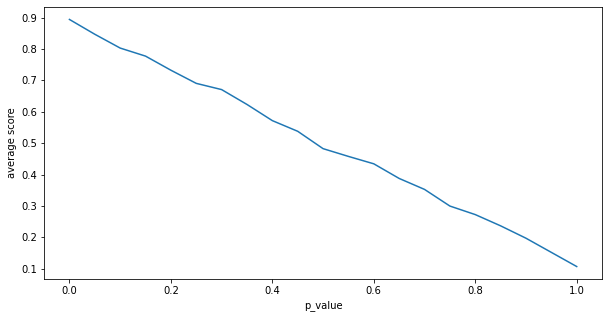

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(x='p_value',y='average score',data=all_result)
plt.show()

- We set 20 p values between 0 to 1 and add 1 to the begining as the unfliped score.
- For each p value we repeat the split 5 times and for each split repeat the flip 20 times, so for each p value we have 100 result, and we take the average.
- From the line plot we can see that the performance getting worse as the p value increase, p value and the score shows a linearity decreasing releationship.

### Bonus question

In [122]:
score_list_class_0 = []
score_list_class_1 = []

for cur_p in p_list:
    score_temp_split_class_0 = []
    score_temp_split_class_1 = []

    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i, stratify=y)

        class_0_index = np.squeeze(np.argwhere(y_train==0))
        class_1_index = np.squeeze(np.argwhere(y_train==1))
        
        score_temp_flip_class_0 = []
        score_temp_flip_class_1 = []

        for j in range(20):
            # Flip the random position

            # flip_index = np.random.choice(len(y_train), int(len(y_train)*cur_p), replace=False)
            # flip_index_class_0 = np.intersect1d(class_0_index,flip_index)
            # flip_index_class_1 = np.intersect1d(class_1_index,flip_index)

            flip_index_class_0 = np.random.choice(class_0_index, int(len(class_0_index)*cur_p), replace=False)
            flip_index_class_1 = np.random.choice(class_1_index, int(len(class_1_index)*cur_p), replace=False)

            y_flip_class_0 = y_train.copy()
            y_flip_class_1 = y_train.copy()

            y_flip_class_0[flip_index_class_0] = ~y_train[flip_index_class_0]+2
            y_flip_class_1[flip_index_class_1] = ~y_train[flip_index_class_1]+2

            dtc.fit(X_train,y_flip_class_0)
            score = recall_score(y_test,dtc.predict(X_test))
            score_temp_flip_class_0.append(score)

            dtc.fit(X_train,y_flip_class_1)
            score = recall_score(y_test,dtc.predict(X_test))
            score_temp_flip_class_1.append(score)
   
        score_temp_split_class_0.append(np.mean(score_temp_flip_class_0))
        score_temp_split_class_1.append(np.mean(score_temp_flip_class_1))

    score_temp_split_class_0.append(np.mean(score_temp_split_class_0))
    score_temp_split_class_1.append(np.mean(score_temp_split_class_1))

    score_list_class_0.append(np.mean(score_temp_split_class_0))
    score_list_class_1.append(np.mean(score_temp_split_class_1))

In [142]:
all_result_class = pd.concat([pd.Series(p_list),pd.Series(score_list_class_0),pd.Series(score_list_class_1)],axis=1)
all_result_class.columns = ['p_value','flip 0','flip 1']
all_result_class

,p_value,flip 0,flip 1
0,0.00,0.891698,0.893019
1,0.05,0.900566,0.852642
2,0.10,0.906604,0.805660
3,0.15,0.916415,0.756981
4,0.20,0.914906,0.704906
5,0.25,0.923208,0.664151
6,0.30,0.930943,0.616415
7,0.35,0.932075,0.580000
8,0.40,0.941887,0.538679
9,0.45,0.944717,0.484151


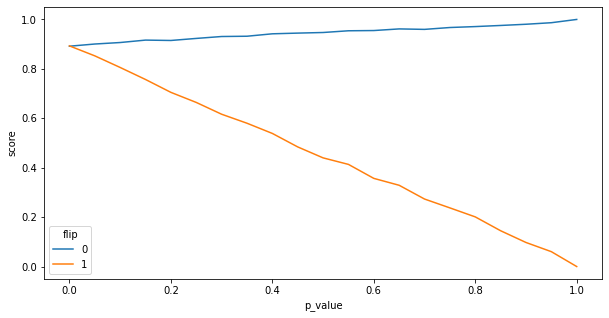

In [140]:
all_result_class_0 = pd.concat([pd.Series(p_list),pd.Series(score_list_class_0),pd.Series(np.full(np.array(p_list).shape,0))],axis=1)
all_result_class_1 = pd.concat([pd.Series(p_list),pd.Series(score_list_class_1),pd.Series(np.full(np.array(p_list).shape,1))],axis=1)

all_result_class = pd.concat([all_result_class_0,all_result_class_1]).reset_index(drop=True)
all_result_class.columns = ['p_value','score','flip']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(data=all_result_class,x='p_value',y='score',hue='flip')
plt.show()

- As the p value increase, when flip 0 to 1, the calssfier gives a better performance until the score close to 1 on prediction.

- As the p value increase, when flip 1 to 0, the calssfier gives a worse performance until the score close to 0 on prediction.

- A possible reason is that out metric as recall focuse more on the positive calss, by fliping 0 to 1 actually let the classifier more eager to predic all samples to positive, and that's why we got better and better result on such metric, the same reason applys why the performance getting worse when flip 1 to 0. 


#### Assumption verification

In [146]:
from sklearn.metrics import accuracy_score

score_list_class_0_acc = []
score_list_class_1_acc = []

for cur_p in p_list:
    score_temp_split_class_0 = []
    score_temp_split_class_1 = []

    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i, stratify=y)

        class_0_index = np.squeeze(np.argwhere(y_train==0))
        class_1_index = np.squeeze(np.argwhere(y_train==1))
        
        score_temp_flip_class_0 = []
        score_temp_flip_class_1 = []

        for j in range(20):
            # Flip the random position

            # flip_index = np.random.choice(len(y_train), int(len(y_train)*cur_p), replace=False)
            # flip_index_class_0 = np.intersect1d(class_0_index,flip_index)
            # flip_index_class_1 = np.intersect1d(class_1_index,flip_index)

            flip_index_class_0 = np.random.choice(class_0_index, int(len(class_0_index)*cur_p), replace=False)
            flip_index_class_1 = np.random.choice(class_1_index, int(len(class_1_index)*cur_p), replace=False)

            y_flip_class_0 = y_train.copy()
            y_flip_class_1 = y_train.copy()

            y_flip_class_0[flip_index_class_0] = ~y_train[flip_index_class_0]+2
            y_flip_class_1[flip_index_class_1] = ~y_train[flip_index_class_1]+2

            dtc.fit(X_train,y_flip_class_0)
            score = accuracy_score(y_test,dtc.predict(X_test))
            score_temp_flip_class_0.append(score)

            dtc.fit(X_train,y_flip_class_1)
            score = accuracy_score(y_test,dtc.predict(X_test))
            score_temp_flip_class_1.append(score)
   
        score_temp_split_class_0.append(np.mean(score_temp_flip_class_0))
        score_temp_split_class_1.append(np.mean(score_temp_flip_class_1))

    score_temp_split_class_0.append(np.mean(score_temp_split_class_0))
    score_temp_split_class_1.append(np.mean(score_temp_split_class_1))

    score_list_class_0_acc.append(np.mean(score_temp_split_class_0))
    score_list_class_1_acc.append(np.mean(score_temp_split_class_1))

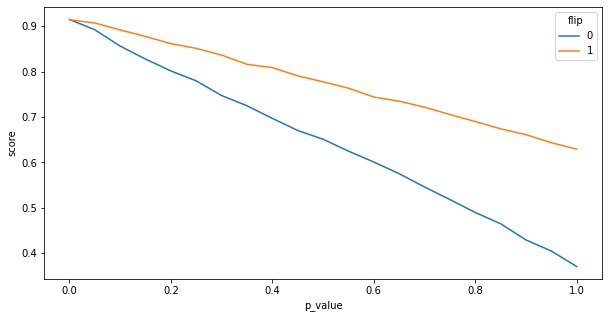

In [147]:
all_result_class_0_acc = pd.concat([pd.Series(p_list),pd.Series(score_list_class_0_acc),pd.Series(np.full(np.array(p_list).shape,0))],axis=1)
all_result_class_1_acc = pd.concat([pd.Series(p_list),pd.Series(score_list_class_1_acc),pd.Series(np.full(np.array(p_list).shape,1))],axis=1)

all_result_class_acc = pd.concat([all_result_class_0_acc,all_result_class_1_acc]).reset_index(drop=True)
all_result_class_acc.columns = ['p_value','score','flip']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(data=all_result_class_acc,x='p_value',y='score',hue='flip')
plt.show()

- By checking the accuarcy score we found that both flip on 0 or 1 all leads to a worse performance, that gives the evidence of our assumption.